In [1]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def crowl_url(url):
    data = pd.read_html(url)
    return data[0]

def CyberMetricsBatter(df):
    try:
        df['IsoP'] = df['長打率']-df['打率']
        df['BB/K'] = df['四球']/df['三振']
        df['BABIP'] = df['打数']-df['三振']-df['本塁打']+df['犠飛']
    except ZeroDivisionError:
        print('0除算がありました。')

    
    return df

def CyberMetricsPitcher(dataframe):
    df['BABIP'] = (df['安打']-df['本塁打']) / (df['打数']-df['奪三振']-df['被本塁打'])


In [2]:
Central_B = crowl_url('http://www.baseball-lab.jp/league/team_ranking/batter/central-league/2019')
Central_P = crowl_url('http://www.baseball-lab.jp/league/team_ranking/pitcher/central-league/2019')
Pacific_B = crowl_url('http://www.baseball-lab.jp/league/team_ranking/batter/pacific-league/2019/')
Pacific_P = crowl_url('http://www.baseball-lab.jp/league/team_ranking/pitcher/pacific-league/2019/')

In [3]:
CentralPlayerBRanking = crowl_url('http://www.baseball-lab.jp/league/player_ranking/batter/central-league/2019')
CentralPlayerPRanking = crowl_url('http://www.baseball-lab.jp/league/player_ranking/pitcher/central-league/2019')
PatcificPlayerBRanking = crowl_url('http://www.baseball-lab.jp/league/player_ranking/batter/pacific-league/2019/')
PatcificPlayerPRanking = crowl_url('http://www.baseball-lab.jp/league/player_ranking/pitcher/pacific-league/2019/')

In [4]:
PatcificPlayerPRanking.columns

Index(['順位', 'チーム', '選手名', '試合', '完投', '当初', '完封', '無四球', '勝数', '負数', 'セーブ',
       'ホールド', 'HP', '勝率', '投球回', '打者', '打数', '被安打', '被本塁打', '与四球', '与死球',
       '奪三振', '暴投', 'ボーク', '失点', '自責点', '防御率', 'BB/9', 'K/9', 'K/BB', 'WHIP'],
      dtype='object')

In [7]:
PatcificPlayerBRanking.columns

Index(['順位', 'チーム', '選手名', '試合', '打席', '打数', '得点', '安打', '二塁打', '三塁打', '本塁打',
       '塁打', '打点', '三振', '四球', '敬遠', '死球', '犠打', '犠飛', '盗塁', '盗塁刺', '併殺打',
       '失策', '打率', '長打率', '出塁率', 'OPS'],
      dtype='object')

In [5]:
a = CyberMetricsBatter(CentralPlayerBRanking)

In [7]:
CentralPlayerBRanking.to_csv('CLBRank.csv')
CentralPlayerPRanking.to_csv('CLPRank.csv')
PatcificPlayerBRanking.to_csv('PPBRank.csv')
PatcificPlayerPRanking.to_csv('PPPRank.csv')

In [1]:
import pandas as pd

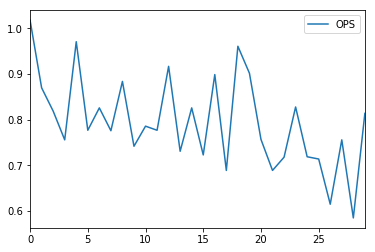

In [11]:
%matplotlib inline
a[['OPS','選手名']].plot()